### `データ処理(教師あり(分類、回帰)、教師なし(次元削減、主成分分析))のまとめ`

| No.| ライブラリ | モジュール | クラス | 関数 | import  | 処理区分 | 説明 |
| ----| ----------- | ------------ | ------- | -------- |  :-------  | -----------| ------|
| 1| sklearn | datasets | load_iris | data/target | from sklearn.datasets import load_iris | Irisデータセット | 150枚のアヤメの「がく」「花びら」の長さとあ幅、花の種類|
| 2| sklearn | model_selection | - | train_test_split() | from sklearn.model_selection import train_test_split | データ処理 | 学習データとテストデータを分割|
| 3| sklearn | svm | SVC(kernel, C)| fit() //学習<br>predict()//予測| from sklearn.svm import SVC | 分類 | カーネル、マージン設定の広さ|
| 4| - | - | -| - | matplotlib.axes.Axes.contour() | 分類 | 決定境界とマージンをプロット|
| 5| sklearn | tree | DecisionTreeClassifier(max_depth=3) | fit()//学習<br>predict()//予測| from sklearn.tree import DecisionTreeClassifier | 分類 | max_depth：決定木の深さ|
| 6| pydotplus | - | - | graph_from_dot_data() | from pydotplus import graph_from_dot_data | 分類 | 決定木を可視化するためのライブラリ<br>関数はグラフを表すオブジェクトを生成|
| 7| sklearn | tree | - | export_graphviz() | from sklearn.tree import export_graphviz | 分類 | 決定木の可視化ツール<br>(dot形式のデータを抽出)|
| 8| sklearn | ensemble | RandomForestClassifier(n,m) | fit()//学習<br>predict()//予測 | from sklearn.ensemble import RandomForestClassifier | 分類 | n:決定数、ランダムフォレスト|
| 9| sklearn | linear_model |  LinearRegression() | fit()//学習<br>predict()//予測 | from sklearn.linear_model import LinearRegression | 回帰 | 線形回帰|
| 10| sklearn | decomposition | PCA(n_components=2) | fit_transform() | from sklearn.decomposition import PCA | 次元削減 | n_components：たな２変数に変換主成分分析を実行|

## 4.4.2 分類
* 分類はデータの「クラス」を予測して分けるタスク
* 教師あり学習の典型的なタスク
* 「教師学習」とはクラスが既知のデータを教師として利用し各データをタスクに振り分ける<span style="color: red; ">←模擬試験1_4-4 ②</span>
* 分類のアルゴリズム
 * 1.サポートベクタマシン
 * 2.決定木
 * 3.ランダムフォレスト

### 分類モデル構築の流れ
- データセットを取得 ->学習データセットとテストデータセットの分割 -> 学習データセットの学習 -> テストデータセットの予測 -> 予測結果

In [6]:
# データセットの準備
from sklearn.datasets import load_iris

# Irisデータセットの読み込み
iris = load_iris()
x, y = iris.data, iris.target



In [13]:
#　頭５行を表示
print(x[:5,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [14]:
print(y[:5])

[0 0 0 0 0]


In [17]:
from sklearn.model_selection import train_test_split

# 学習データセットとテストデータセットに分割
# test_size:テストデータの割合、random_state：データを分割する際に用いるシード値を固定するための値
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


## 1、サポートベクタマシン
- カーネル
- 決定境界
- サポートベクタ
- マージン

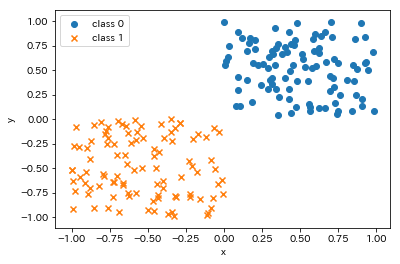

In [29]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

# X軸Y軸共に0から１までの一様分布から100点をサンプリング
X0 = np.random.uniform(size=(100,2))
# クラス0のラベルを100個生成
y0 = np.repeat(0,100)
# X軸Y軸共に-1から0までの一様分布から100点をサンプリング
X1 = np.random.uniform(-1.0,0.0,size=(100,2))
# クラス1のラベルを100個生成
y1 = np.repeat(1,100)

# 散布図にプロット
fig, ax = plt.subplots()
ax.scatter(X0[:,0],X0[:,1],marker='o',label='class 0')
ax.scatter(X1[:,0],X1[:,1],marker='x',label='class 1')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()


In [27]:
X0 = np.random.uniform(size=(100,2))
X0[99,0]

0.5671198321066371

In [35]:
from sklearn.svm import SVC
# 学習、および決定境界、マージン、サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    # サポートベクタマシンのインスタンス化
    svc = SVC(kernel=kernel, C=C)
    # 学習
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1], marker='o', label='class 0')
    ax.scatter(X1[:, 0], X1[:, 1], marker='x', label='class 1')
    # 決定境界とマージンをプロット
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p,
               colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])
    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:, 0],
               svc.support_vectors_[:, 1],
               s=250, facecolors='none',
              edgecolors='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()                                                  

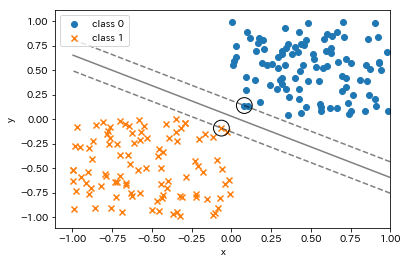

In [38]:
# 広く設定
# Cはどれだけマージンを広く設定するのかとの意味がある
plot_boundary_margin_sv(X0,y0,X1,y1,kernel='linear',C=1e6)

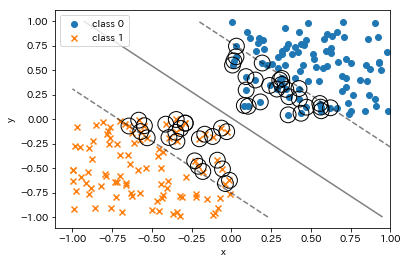

In [48]:
# C小さいマージンが程広く、大きい程マージン狭く
plot_boundary_margin_sv(X0,y0,X1,y1,kernel='linear',C=0.1)

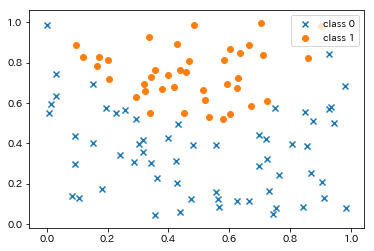

In [49]:
# 直線で分離できないパータン
np.random.seed(123)
X = np.random.random(size=(100, 2))
y = (X[:, 1] > 2*(X[:, 0]-0.5)**2 +0.5).astype(int)
fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y ==0, 1], marker='x', label='class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label='class 1')
ax.legend()
plt.show()

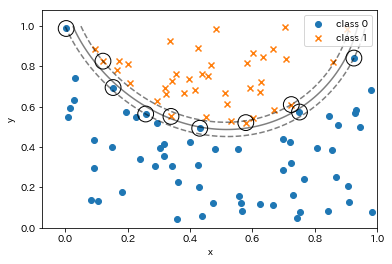

In [51]:
# 決定境界、マージン、サポートベクタをプロット
X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='rbf', C=1e3, xmin=0, ymin=0)

## ２、決定木
* 情報利得 ー　データを分割ことによってどれだけ得をする　情報利得は大きくなれば決定木は綺麗になる
* 不純度 ー どれだけクラスが混在している　不純度下がるほどクラスを綺麗になる
* 情報利得 = 親ノードでの不純度 - 子ノードでの不純度の合計
* 不純度の指標
 * ジニ不純度
 * エントロピー
 * 分類誤差
* ジニ不純度 ー各ノードに間違ったクラスが振り分けられてしまう確率

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Iris データを読み込み
iris = load_iris()
X, y = iris.data, iris.target
# 学習データセットとテストデータセットに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# 決定木をインスタンス化する
tree = DecisionTreeClassifier(max_depth=3)
# 学習
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
# 予測
y_pred = tree.predict(X_test)
y_test

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [24]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

#dot形式のデータを抽出
dot_data = export_graphviz(tree,filled =True,rounded = True,class_names = [
                                                                                                                                    'Setosa', 
                                                                                                                                    'Versicolor', 
                                                                                                                                    'Virginica'],
                                                                                                       feature_names = [
                                                                                                                                    'Sepal Length',
                                                                                                                                    'Sepal Width',
                                                                                                                                    'Petal Length',
                                                                                                                                    'Petal Width'],out_file=None)
# 決定木のプロットを出力
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

## ３、ランダムフォレスト
* データサンプルをランダムで選択し決定木を構築　←複数回繰り返す →各木の結果の多数決や平均値より分類と回帰を行う
* ブートストラップデータ　ー　ランダムで選択したデータサンプル
* アンサンブル学習　ー　複数の学習機を用いた学習方法　

In [28]:
from sklearn.ensemble import RandomForestClassifier

#ランダムフォレストをインスタンス化する
forest = RandomForestClassifier(n_estimators = 100,random_state=123)

#学習
forest.fit(X_train,y_train)

# 予測
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## 4.4.3 回帰

* 回帰とは　`目的変数`を複数の`説明変数`で説明する
* 線形回帰とは `目的変数`をy, `説明変数`をx1・・・xpとした時、 `y = a0 + a1x1 + ・・・ + apxp`　
* 説明変数を求める方法`最尤法`と`最小二乗法`

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Bostonデータセットをう読み取り
boston = load_boston()
X, y = boston.data, boston.target
# 学習データセットとテストデータセットに分割
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=123)

#線形回帰をインスタンス化
lr = LinearRegression()

#学習
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
# テストデータセットを予測
y_pred = lr.predict(X_test)
y_test

array([15. , 26.6, 45.4, 20.8, 34.9, 21.9, 28.7,  7.2, 20. , 32.2, 24.1,
       18.5, 13.5, 27. , 23.1, 18.9, 24.5, 43.1, 19.8, 13.8, 15.6, 50. ,
       37.2, 46. , 50. , 21.2, 14.9, 19.6, 19.4, 18.6, 26.5, 32. , 10.9,
       20. , 21.4, 31. , 25. , 15.4, 13.1, 37.6, 37. , 18.9, 27.9, 50. ,
       14.4, 22. , 19.9, 21.6, 15.6, 15. , 32.4, 29.6, 20.4, 12.3, 19.1,
       14.9, 17.8,  8.8, 35.4, 11.5, 19.6, 20.6, 15.6, 19.9, 23.3, 22.3,
       24.8, 16.1, 22.8, 30.5, 20.4, 24.4, 16.6, 26.2, 16.4, 20.1, 13.9,
       19.4, 22.8, 13.8, 31.6, 10.5, 23.8, 22.4, 19.3, 22.2, 12.6, 19.4,
       22.2, 29.8,  9.6, 34.9, 21.4, 25.3, 32.9, 26.6, 14.6, 31.5, 23.3,
       33.3, 17.5, 19.1, 48.5, 17.1, 23.1, 28.4, 18.9, 13. , 17.2, 24.1,
       18.5, 21.8, 13.3, 23. , 14.1, 23.9, 24. , 17.2, 21.5, 19.1, 20.8,
       36. , 20.1,  8.7, 13.6, 22. , 22.2, 21.1, 13.4, 17.4, 20.1, 10.2,
       23.1, 10.2, 13.1, 14.3, 14.5,  7.2, 19.6, 20.6, 22.7, 26.4,  7.5,
       20.3, 50. ,  8.5, 20.3, 16.1, 22. , 19.6, 10

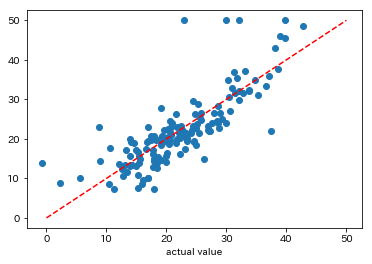

In [10]:
import matplotlib.pyplot as plt

# 横軸を予測値、縦軸を実績値とする散布図をプロットする
fig, ax =plt.subplots()

ax.scatter(y_pred,y_test)
ax.plot((0, 50),(0, 50), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_xlabel('actual value')
plt.show()

## 4.4.4 次元削減

### 次元削減
* 次元削減とは、データがもつ情報をなるべく損ねることがなく次元を削減してデータを圧縮するタスクです。

### 主成分分析(principal component analysis PCA)
* 次元削減とは、高次元のデータに対して分散が大きくなる方向（データが散らばっている方向）を探して、元のデータと同じかそれよりも低い次元にデータを変換する手法です。


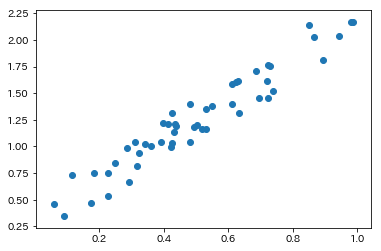

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# シード値を固定
np.random.seed(123)

# 0以上１未満の一様分布を50個生成
X = np.random.random(size=50)

# Ｘを２倍にした後、0以上1未満の一様分布を0.5倍して足し合わせる
Y = 2*X +0.5*np.random.rand(50)

# 散布図をプロット
fig, ax = plt.subplots()
ax.scatter(X,Y)

plt.show()

In [9]:
from sklearn.decomposition import PCA

# 主成分のクラスをインスタンス化
# n_components : 新たな２変数に変換という意味
pca = PCA(n_components=2)

#主成分分析を実行
X_pca = pca.fit_transform(np.hstack((X[:, np.newaxis],Y[:, np.newaxis])))


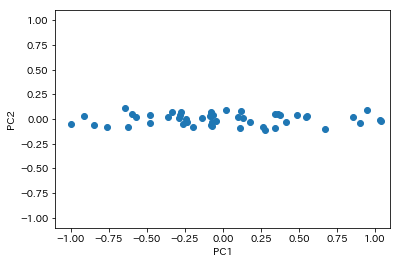

In [12]:
# 主成分分析結果から得られた座標を散布図にプロット
fig, ax =plt.subplots()
ax.scatter(X_pca[:,0],X_pca[:,1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1 , 1.1)
plt.show()